<a href="https://colab.research.google.com/github/xerathul/python/blob/master/tf28cnn_mnist_seqential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN : 이미지의 특징을 뽑아 크기를 줄인 후 마지막에 1차원 배열로 만든 후 Dense에게 전달하는 방식
# MNIST dataset을 사용
# Sequential api 방법

import tensorflow as tf
from keras import datasets, layers, models

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)   #(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
# CNN은 Channel을 사용하기 때문에 3차원 데이터를 4차원으로 변경해 준다.
x_train = x_train.reshape((60000, 28, 28, 1)) 
x_test = x_test.reshape((10000, 28, 28, 1))
print(x_train.ndim, x_test.ndim)  #4 4
# print(x_train[:1])

#정규화
x_train = x_train / 255.0
x_test = x_test / 255.0
# print(x_train[:1])
# print(x_train[[[0]]])
print(y_train[[0]])



4 4
[5]


In [3]:
# model : Sequential api 설계
input_shape = (28, 28, 1)

model = models.Sequential()

#padding='same' 원본이미지 밖에 0 으로 채우기 kernel_size=(3,3)> 돋보기 눈금, strides=(1,1) > 1칸씩 이동
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid',
                        activation='relu', input_shape= input_shape))
model.add(layers.MaxPool2D(pool_size=(2,2)))  # Conv 레이어에서 출력된 이미지를 축소하는 기능
model.add(layers.Dropout(0.2))  #20%는 작업에 참여 x (과적합 방지)

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))  # Conv 레이어에서 출력된 이미지를 축소하는 기능
model.add(layers.Dropout(0.2))  #20%는 작업에 참여 x (과적합 방지)

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))  # Conv 레이어에서 출력된 이미지를 축소하는 기능
model.add(layers.Dropout(0.2))  #20%는 작업에 참여 x (과적합 방지)

# Dense주기전 1열로 줄세우기
model.add(layers.Flatten())   #FCLayer(Fully Connected Layer) 이미지 1차원으로 변경

# 분류기(Dense)로 전달
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

In [ ]:
from keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
es = EarlyStopping(patience=10)
history = model.fit(x_train, y_train, batch_size=128, epochs=1000, verbose=2, validation_split=0.2,
                    callbacks=[es])
# model 학습 후 모델 저장 근데 history 값도 계속 참조하고 싶은 경우 pickle로 저장
import pickle
history = history.history
with open('his_data.pickle','wb') as f:
  pickle.dump(history, f)

print(history)

In [7]:
# 모델 평가(train/ test)

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc:',train_loss, train_acc)
print('test_loss, test_acc :',test_loss, test_acc )

# model save
model.save('tf28.h5')

313/313 [==============================] - 1s 3ms/step - loss: 0.0410 - acc: 0.9889
train_loss, train_acc: 0.018956860527396202 0.9946833252906799
test_loss, test_acc : 0.0410364605486393 0.9889000058174133


In [8]:
model2 = tf.keras.models.load_model('tf28.h5')

#predict
import numpy as np
print('pred:', np.argmax(model2.predict(x_test[:1])))
print('real:', y_test[0])


pred: 7
real: 7


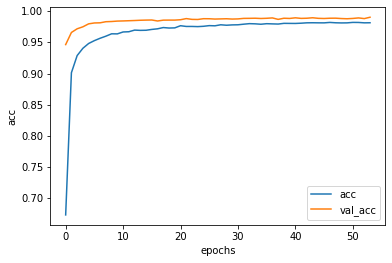

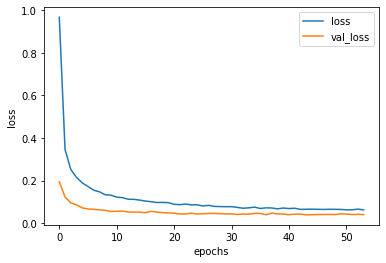

In [13]:
# 시각화
import matplotlib.pyplot as plt
with open('his_data.pickle','rb') as f:
  history = pickle.load(f)

def plot_acc():
  plt.plot(history['acc'], label='acc')
  plt.plot(history['val_acc'], label='val_acc')
  plt.xlabel('epochs')
  plt.ylabel('acc')
  plt.legend()

def plot_loss():
  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

plot_acc()
plt.show()
plot_loss()
plt.show()